# Check accuracy of several classifiers

In [1]:

import numpy as np
import pandas as pd

In [2]:
#load the news data csv file
myNews = pd.read_csv('goodNewsData')

In [3]:
allDirectories = ['World','National News','Auto','Entertainment','Sports','Education','Bank','Business Interview','Interview','Blog','Literature','Employment','Opinion','Technology','Tourism','Economy']

In [4]:
myNews = myNews.drop(columns='Unnamed: 0')
myNews.head()

,labels,name,cleanText,noStopWords
0,1,National News,﻿ २१ मंसिर चितवन टेण्डर बिनै बाल उद्यान स...,﻿ २१ मंसिर चितवन टेण्डर बिनै बाल उद्यान सञ्चाल...
1,1,National News,﻿आश्विन १९ काठमाण्डौं बढा दशैं व्यस्तता क...,﻿आश्विन १९ काठमाण्डौं बढा दशैं व्यस्तता कमिआए ...
2,1,National News,﻿संविधानसभा प्रमुख राजनीतिक दल निषेध गर्दै स...,﻿संविधानसभा प्रमुख राजनीतिक दल निषेध संविधानसभ...
3,0,World,﻿एजेन्सी चीन र रूस मिलेर संसारकै सबैभन्दा...,﻿एजेन्सी चीन रूस मिलेर संसारकै सबैभन्दा शक्तिश...
4,15,Economy,﻿ १ पुस वीरगन्ज भारत सरकार पाँच सय र हजार...,﻿ १ पुस वीरगन्ज भारत सरकार सय हजार नोट प्रतिबन...


In [5]:

labeldataset = myNews['labels']
labelTrain = labeldataset[0:13000]
labelTest = labeldataset[13000:]

#remove stopwords
import codecs,re
#stopwords
stopwordsNep = u""" """
with codecs.open('stopwordsNepali.txt','r','utf-8') as file:
    stopwordsNep += file.read()
stopwordsNep = re.sub(r'(\n)'," ",stopwordsNep).strip(' ')

stopwordsList = set(stopwordsNep.split(' '))

In [6]:
#create vectors
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df= 0.50,min_df= 0.001,
            tokenizer= lambda x: x.split(" "),decode_error='ignore',
            sublinear_tf= True )     

vectorMatrixClean = vectorizer.fit_transform(myNews['noStopWords'])
vectorMatrixTrainClean = vectorMatrixClean[0:13000]
vectorMatrixTestClean = vectorMatrixClean[13000:]

In [7]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
#from sklearn.svm import SG
from sklearn.linear_model import SGDClassifier

import multiprocessing as mlt

In [8]:
#naieve BAyes
clfMB = MultinomialNB(alpha=0.01)
clfMB.fit(vectorMatrixTestClean,labelTest)
#metrics.confusion_matrix(labelTest,clf1.predict(vectorMatrixTestClean))

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [122]:
#SGD CLASSIFIER 
#assigning different weights for various classes. I gave more weights to National News and World News
weight_dict = {0: 5,1: 15,2: 1,3: 7,4: 8,5: 1,6: 2,
 7: 2,8: 2,9: 2,10: 1,11: 3,12: 6,13: 2,14: 4,
 15: 7}
clfSGD = SGDClassifier(n_jobs=4,n_iter=20,class_weight=None).fit(vectorMatrixTrainClean,labelTrain)

/home/deep_mind/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [9]:
def giveMetrics(nameCLF,trainedclf,trainData,trainLabel,testData,testLabel):
    trainScore = trainedclf.score(trainData,trainLabel)
    testScore = trainedclf.score(testData,testLabel)
    print('{} has following attributes : '.format(nameCLF))
    print('The training Accuracy of {} model is : {} '.format(nameCLF,trainScore))
    print('The testing Accuracy of {} model is : {} '.format(nameCLF,testScore))
    return trainScore,testScore

In [10]:
giveMetrics('Multinomial Naive Bayes',clfMB,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)

Multinomial Naive Bayes has following attributes : 
The training Accuracy of Multinomial Naive Bayes model is : 0.7285384615384616 
The testing Accuracy of Multinomial Naive Bayes model is : 0.9728739002932552 


(0.72853846153846158, 0.97287390029325516)

In [125]:
giveMetrics('SGDCLassifier',clfSGD,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)

SGDCLassifier has following attributes : 
The training Accuracy of SGDCLassifier model is : 0.9372307692307692 
The testing Accuracy of SGDCLassifier model is : 0.8291788856304986 


(0.9372307692307692, 0.82917888563049857)

In [119]:
clfBer = BernoulliNB().fit(vectorMatrixTrainClean,labelTrain)
giveMetrics('Bernoulli CLassifier',clfBer,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)

Bernoulli CLassifier has following attributes : 
The training Accuracy of Bernoulli CLassifier model is : 0.6770769230769231 
The testing Accuracy of Bernoulli CLassifier model is : 0.6642228739002932 


(0.67707692307692313, 0.66422287390029322)

In [29]:
from sklearn import neighbors
clfKNN = neighbors.KNeighborsClassifier(n_neighbors=30)
clfKNN.fit(vectorMatrixTrainClean, labelTrain)
giveMetrics('KNN',clfKNN,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest)

KNN has following attributes : 
The training Accuracy of KNN model is : 0.7743076923076923 
The testing Accuracy of KNN model is : 0.7793255131964809 


(0.77430769230769225, 0.77932551319648091)

In [14]:
#LINEAR SVC
from sklearn.svm import LinearSVC

clfSVCLIN = LinearSVC().fit(vectorMatrixTrainClean,labelTrain)
clfSVCLIN.score(vectorMatrixTestClean,labelTest)

0.79545454545454541

In [31]:
clf_names = ['Multinomial-NB',' Bernoulli NB','SGD classifier','K-nearestNeighbor','SVC(linear)']
classifiers = [clfMB,clfBer,clfSGD,clfKNN,clfSVCLIN]
overallScores = []
for clf_names,classifiers in zip(clf_names,classifiers):
    overallScores.append(giveMetrics(clf_names,classifiers,vectorMatrixTrainClean,labelTrain,vectorMatrixTestClean,labelTest))


Multinomial-NB has following attributes : 
The training Accuracy of Multinomial-NB model is : 0.7305384615384616 
The testing Accuracy of Multinomial-NB model is : 0.967741935483871 
 Bernoulli NB has following attributes : 
The training Accuracy of  Bernoulli NB model is : 0.7543076923076923 
The testing Accuracy of  Bernoulli NB model is : 0.7265395894428153 
SGD classifier has following attributes : 
The training Accuracy of SGD classifier model is : 0.9327692307692308 
The testing Accuracy of SGD classifier model is : 0.8299120234604106 
K-nearestNeighbor has following attributes : 
The training Accuracy of K-nearestNeighbor model is : 0.7743076923076923 
The testing Accuracy of K-nearestNeighbor model is : 0.7793255131964809 
SVC(linear) has following attributes : 
The training Accuracy of SVC(linear) model is : 0.9907692307692307 
The testing Accuracy of SVC(linear) model is : 0.842375366568915 


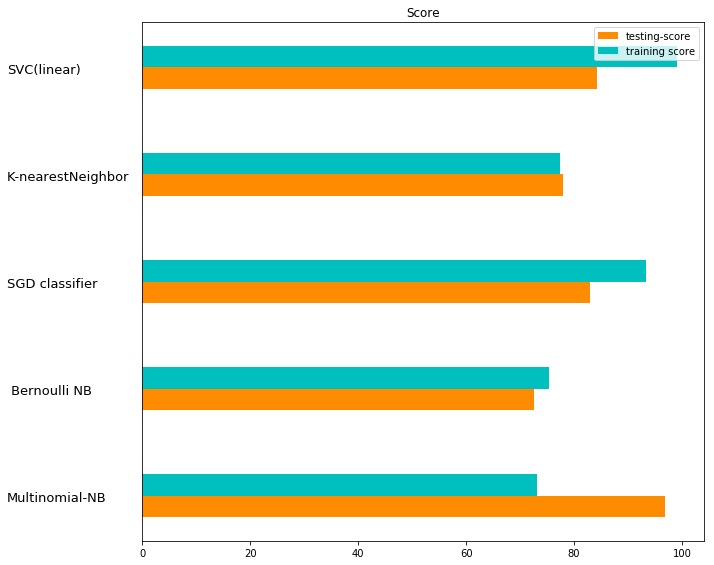

In [33]:
#plot the accuracy of diffenrent classification algorithms

%matplotlib inline
import matplotlib.pyplot as plt

indices = np.arange(5)
test_score = np.array([i[1] for i in overallScores]) *100
train_score = np.array([i[0] for i in overallScores])*100

plt.figure(figsize=(12, 8))
plt.title("Score")
#plt.yscale('linear')
plt.barh(indices, test_score , .2, label="testing-score", color='darkorange')
plt.barh(indices + 0.2 , train_score , .2, label="training score",color='c')
#plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)
names = ['Multinomial-NB',' Bernoulli NB','SGD classifier','K-nearestNeighbor','SVC(linear)']
for i, c in zip(indices, names):
    plt.text(-25,i+0.05,c,fontsize = 13)



plt.show()